# 👥 People Entry/Exit Counter with YOLOv8 + DeepSORT
This notebook detects and counts people entering and exiting a defined area using a trained YOLOv8 model and DeepSORT tracking.

In [ ]:
# 📦 Install dependencies
!pip install -q ultralytics deep_sort_realtime opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.2 MB/s eta 0:00:00


In [ ]:
import cv2
from PIL import Image
from IPython.display import display
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r "/content/drive/MyDrive/Model" "/content/"

In [ ]:
model_path = '/content/Model/Yolov8n.pt'
video_path = '/content/vid4.mp4'

In [ ]:
# ⚙️ Load model and initialize tracker
model = YOLO(model_path)
tracker = DeepSort(max_age=30)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Define the Lines

In [ ]:
line_pt1 = (800, 800)
line_pt2 = (800, 100)



## Testing the line With Middle frames

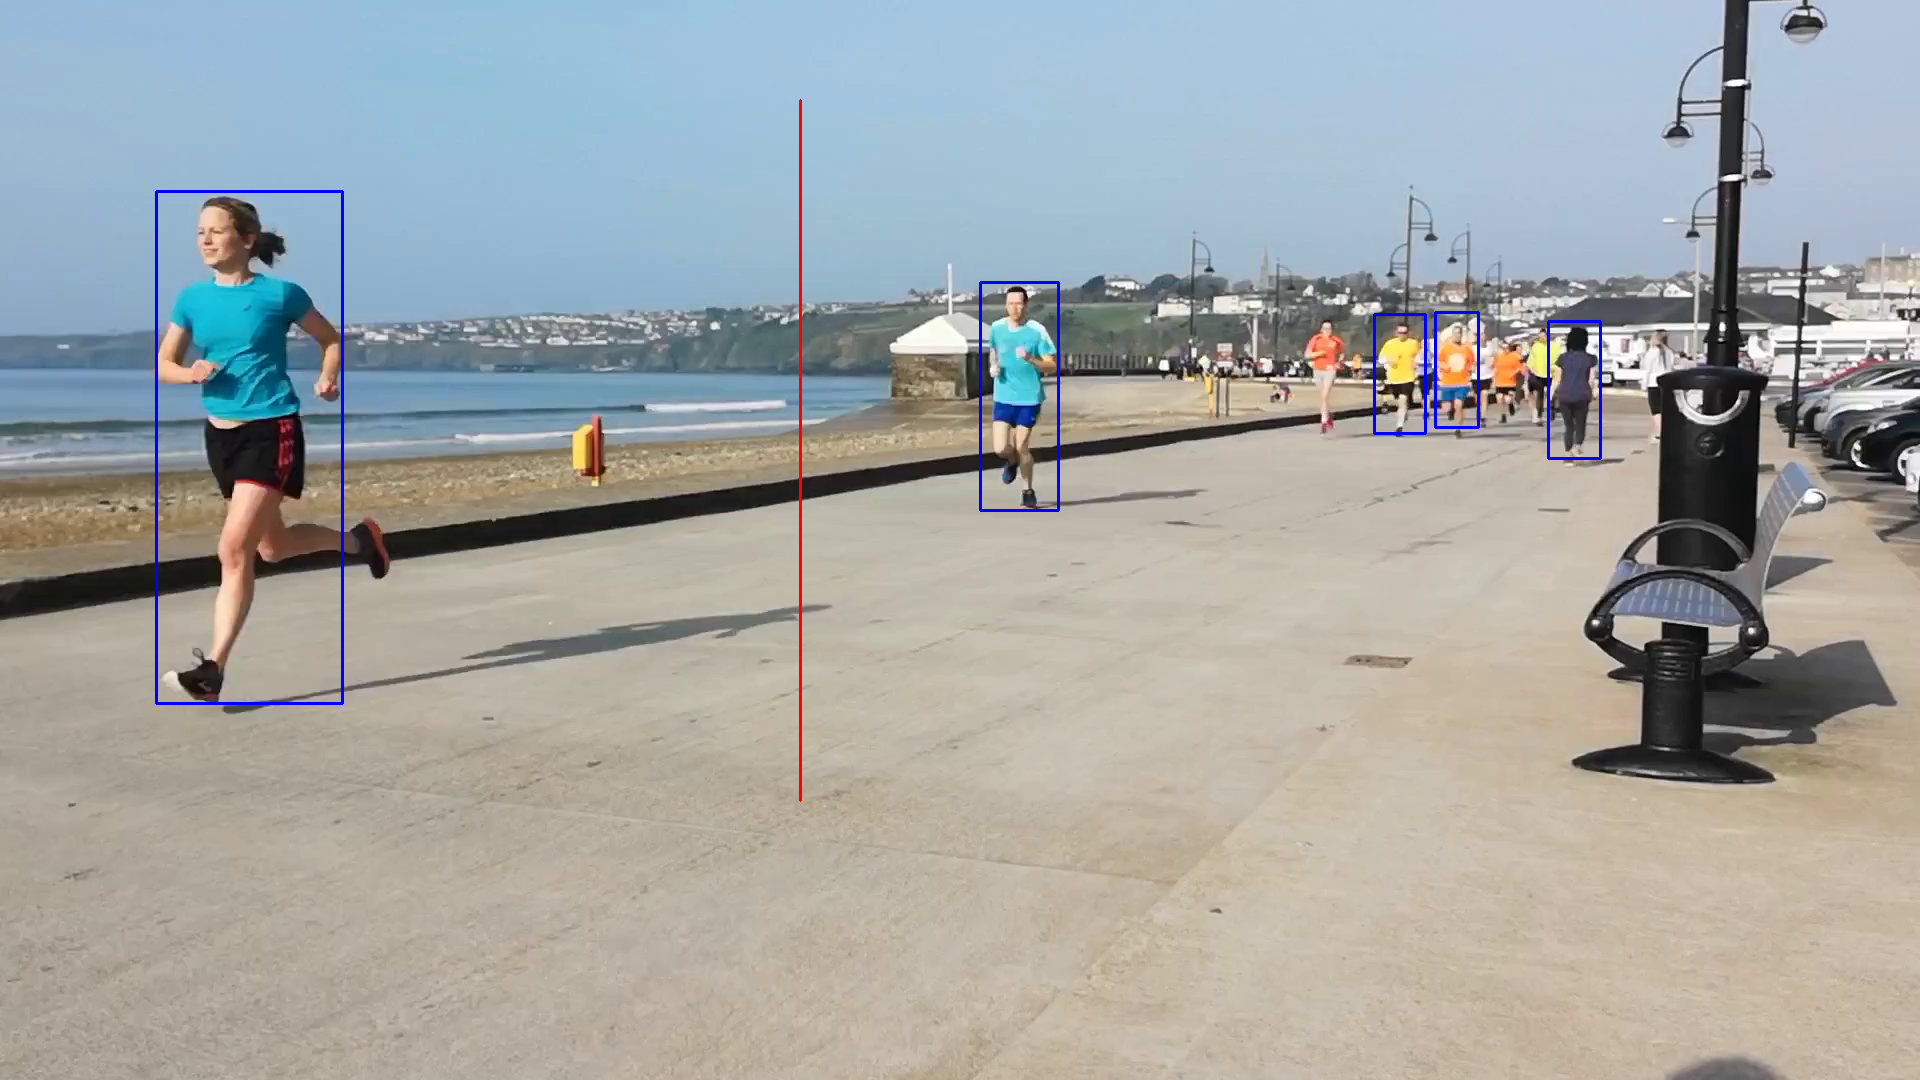

In [ ]:
cap_preview = cv2.VideoCapture(video_path)
ret_preview, frame_preview = cap_preview.read()
if ret_preview:
    # Perform detection on the first frame
    results_preview = model.predict(frame_preview, conf=0.4, verbose=False)[0]
    detections_preview = []
    for box in results_preview.boxes.data:
        x1, y1, x2, y2, conf, cls = box.cpu().numpy()
        if int(cls) == 0:  # Person class
            detections_preview.append(([x1, y1, x2 - x1, y2 - y1], conf, 'person'))
    # Draw bounding boxes on the first frame
    for detection in detections_preview:
        x, y, w, h = detection[0]
        cv2.rectangle(frame_preview, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 2)
      # Draw the slanted line on the first frame
    cv2.line(frame_preview, line_pt1, line_pt2, (0, 0, 255), 2)
    # Display the first frame
    # Convert the frame to RGB for displaying in a notebook
    frame_preview_rgb = cv2.cvtColor(frame_preview, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(frame_preview_rgb))
# Release the capture object
cap_preview.release()

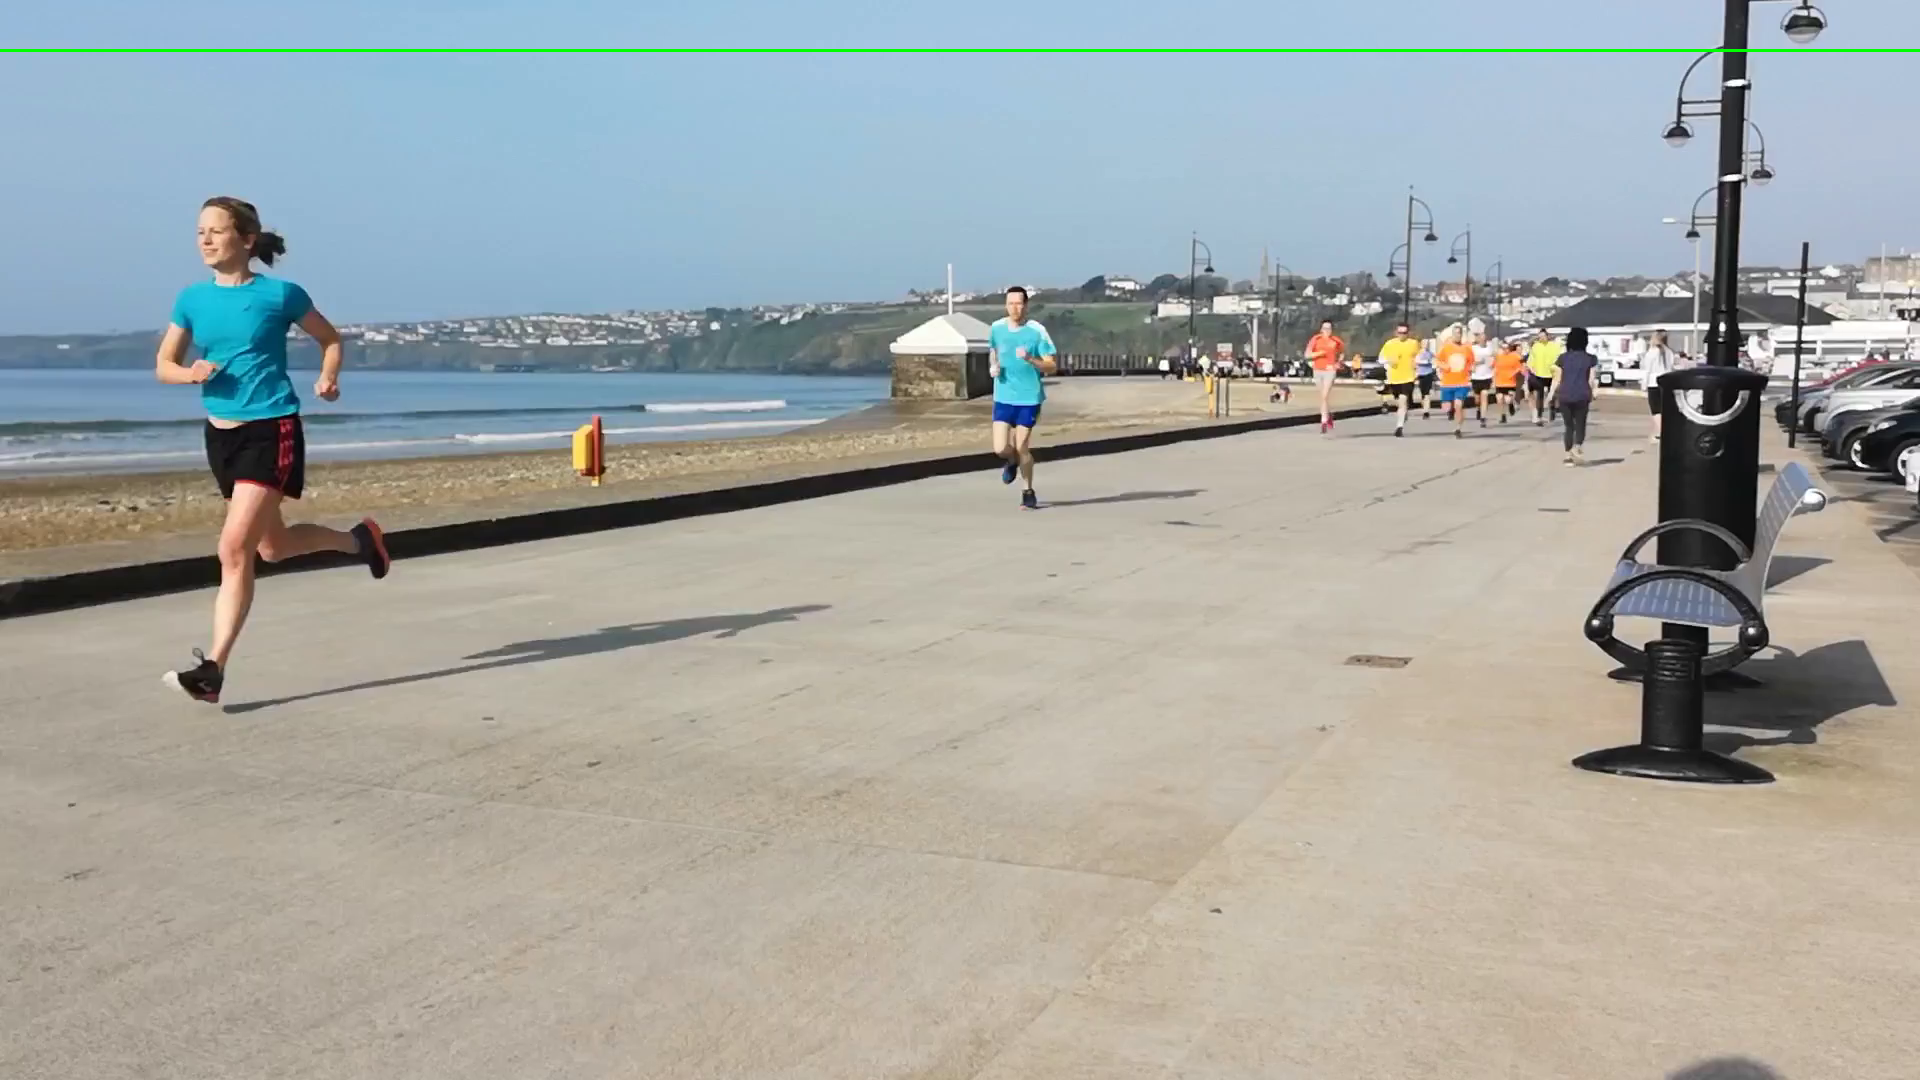

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

line_y = 50  # Change this to your desired line position

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
if ret:
    cv2.line(frame, (0, line_y), (frame.shape[1], line_y), (0, 255, 0), 2)
    cv2_imshow(frame)

else:
    print("Failed to read frame from video.")

cap.release()

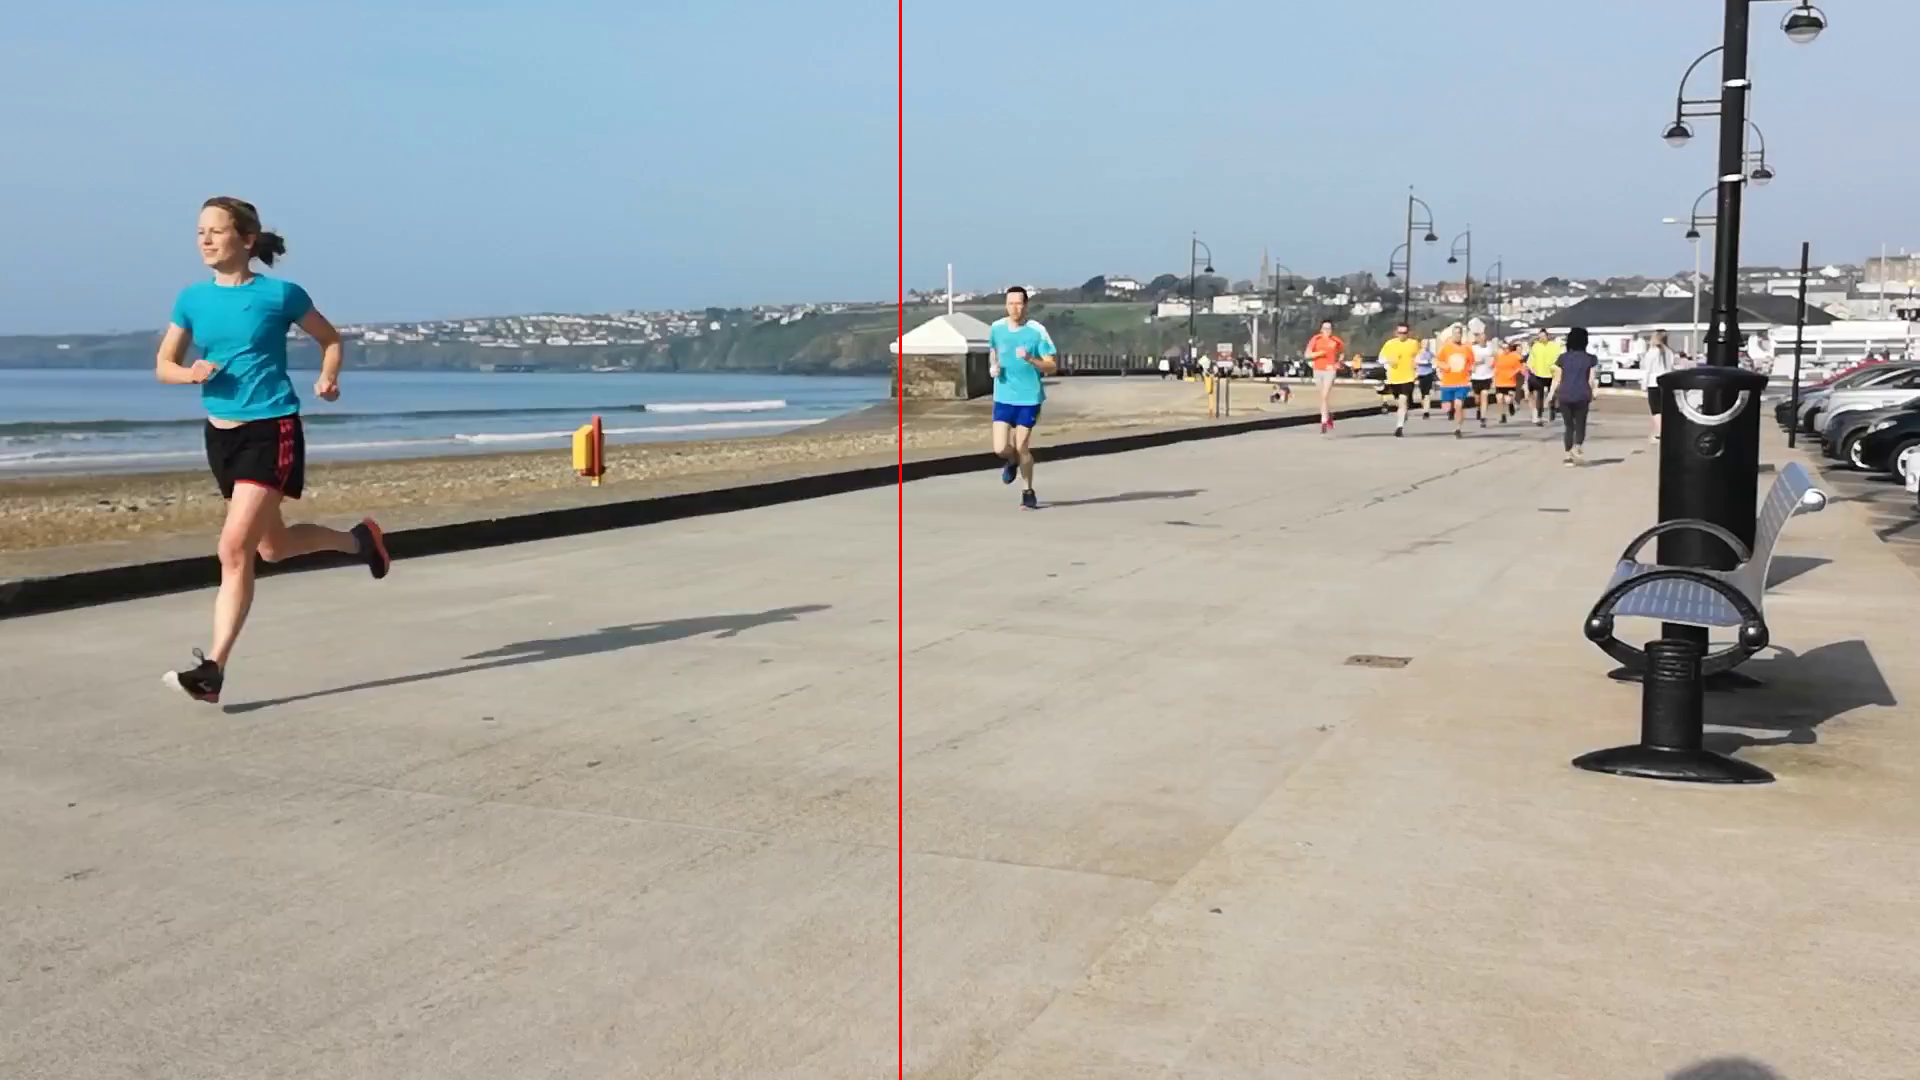

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
line_x = 900
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
if ret:
    cv2.line(frame, (line_x, 0), (line_x, frame.shape[0]), (0, 0, 255), 2)
    cv2_imshow(frame)
else:
    print("Failed to read frame from video.")
cap.release()

In [ ]:
# 🎯 Entry/Exit logic and video processing
line_y = 50
entry_count = 0
exit_count = 0
track_memory = {}

cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (width, height))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    results = model.predict(frame, conf=0.4, verbose=False)[0]
    detections = []
    for box in results.boxes.data:
        x1, y1, x2, y2, conf, cls = box.cpu().numpy()
        if int(cls) == 0:
            detections.append(([x1, y1, x2 - x1, y2 - y1], conf, 'person'))
    tracks = tracker.update_tracks(detections, frame=frame)
    for track in tracks:
        if not track.is_confirmed():
            continue
        track_id = track.track_id
        l, t, r, b = track.to_ltrb()
        cx = int((l + r) / 2)
        cy = int((t + b) / 2)
        if track_id in track_memory:
            prev_y = track_memory[track_id]
            if prev_y < line_y and cy >= line_y:
                entry_count += 1
            elif prev_y > line_y and cy <= line_y:
                exit_count += 1
        track_memory[track_id] = cy
        cv2.rectangle(frame, (int(l), int(t)), (int(r), int(b)), (255,0,0), 2)
        cv2.putText(frame, f"ID: {track_id}", (int(l), int(t) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,255), 2)
    cv2.line(frame, (0, line_y), (frame.shape[1], line_y), (0,255,0), 2)
    cv2.putText(frame, f"Entry: {entry_count}  Exit: {exit_count}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
    out.write(frame)
cap.release()
out.release()
cv2.destroyAllWindows()

In [28]:
import cv2

# Define entry/exit counters
entry_count = 0
exit_count = 0
track_memory = {}
# Dictionary to keep track of whether a track has entered or exited
track_status = {}

# Define the vertical line position
line_x = 900

cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame, conf=0.4, verbose=False)[0]

    detections = []
    for box in results.boxes.data:
        x1, y1, x2, y2, conf, cls = box.cpu().numpy()
        if int(cls) == 0:
            detections.append(([x1, y1, x2 - x1, y2 - y1], conf, 'person'))

    tracks = tracker.update_tracks(detections, frame=frame)

    for track in tracks:
        if not track.is_confirmed():
            continue
        track_id = track.track_id
        l, t, r, b = track.to_ltrb()
        cx = int((l + r) / 2)
        cy = int((t + b) / 2)

        # Initialize track status if not present
        if track_id not in track_status:
            track_status[track_id] = "none" # "none", "entered", "exited"

        if track_id in track_memory:
            prev_x = track_memory[track_id]
            if prev_x < line_x and cx >= line_x:
                if track_status[track_id] != "entered":
                    entry_count += 1
                    track_status[track_id] = "entered"
            elif prev_x > line_x and cx <= line_x:
                if track_status[track_id] != "exited":
                    exit_count += 1
                    track_status[track_id] = "exited"

        track_memory[track_id] = cx

        # Determine bounding box color based on status
        bbox_color = (255, 0, 0) # Default color (blue)
        if track_status[track_id] == "entered":
            bbox_color = (0, 255, 0) # Green for entered
        elif track_status[track_id] == "exited":
            bbox_color = (0, 0, 255) # Red for exited

        cv2.rectangle(frame, (int(l), int(t)), (int(r), int(b)), bbox_color, 2)
        cv2.putText(frame, f"ID: {track_id}", (int(l), int(t) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

    # Draw vertical line
    cv2.line(frame, (line_x, 0), (line_x, frame.shape[0]), (0, 255, 0), 2)
    cv2.putText(frame, f"Entry: {entry_count}  Exit: {exit_count}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

    out.write(frame)

# Clean up memory for tracks that are no longer visible
    active_track_ids = {track.track_id for track in tracks if track.is_confirmed()}
    ids_to_remove = [track_id for track_id in track_memory if track_id not in active_track_ids]
    for track_id in ids_to_remove:
        del track_memory[track_id]
        if track_id in track_status:
            del track_status[track_id]


cap.release()
out.release()
cv2.destroyAllWindows()

In [29]:
# 📤 Download result video
from google.colab import files
files.download("output.avi")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inside Buss

In [35]:
model_path = '/content/Model/Yolov8n.pt'
video_path = '/content/Ld People Getting Off The Bus And Others Entering It 4K Stock Video - Download Video Clip Now - iStock.mp4'

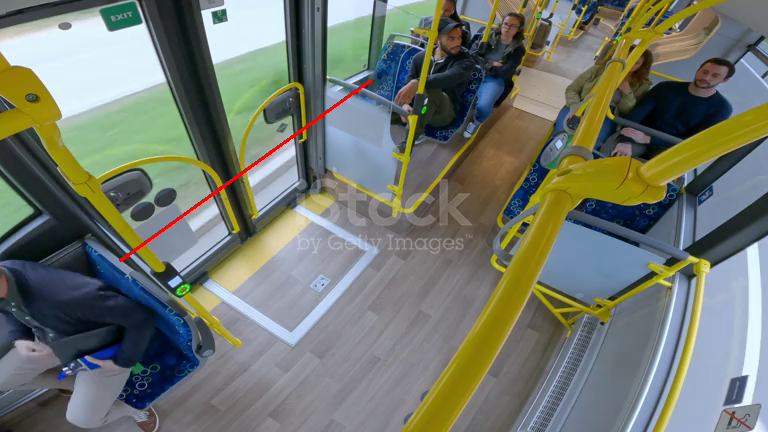

In [39]:
import cv2
from google.colab.patches import cv2_imshow

# Define slanted line points
line_pt1 = (120, 260)
line_pt2 = (370, 80)

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()

if ret:
    # Draw the slanted line
    cv2.line(frame, line_pt1, line_pt2, (0, 0, 255), 2) # Red color, thickness 2
    cv2_imshow(frame)
else:
    print("Failed to read frame from video.")

cap.release()

In [44]:
import cv2
import numpy as np

# Define entry/exit counters
entry_count = 0
exit_count = 0
track_memory = {}
track_counted = {}  # To keep track of counted tracks
track_history = {}  # To store position history for each track
history_length = 5  # Number of frames to keep in history

# Define slanted line points (estimated from your image)
#line_pt1 = (100, 210)  # left endpoint of the red line
#line_pt2 = (370, 30)   # right endpoint of the red line

# Function to determine which side of the line a point is on
def point_side(px, py, x1, y1, x2, y2):
    return (x2 - x1)*(py - y1) - (y2 - y1)*(px - x1)

# Function to check if a segment crosses the line
def segment_crosses_line(p1, p2, line_pt1, line_pt2):
    side1 = point_side(p1[0], p1[1], *line_pt1, *line_pt2)
    side2 = point_side(p2[0], p2[1], *line_pt1, *line_pt2)
    return (side1 < 0 and side2 > 0) or (side1 > 0 and side2 < 0)

# Open video
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (width, height))

# Add cooldown mechanism to prevent rapid double counts
crossing_cooldown = {}  # Dictionary to store cooldown frames for each track
cooldown_frames = int(fps * 1.5)  # 1.5 second cooldown

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    results = model.predict(frame, conf=0.4, verbose=False)[0]
    detections = []

    for box in results.boxes.data:
        x1, y1, x2, y2, conf, cls = box.cpu().numpy()
        if int(cls) == 0:  # Person class
            detections.append(([x1, y1, x2 - x1, y2 - y1], conf, 'person'))

    tracks = tracker.update_tracks(detections, frame=frame)

    # Create a copy of frame for visualization
    viz_frame = frame.copy()

    for track in tracks:
        if not track.is_confirmed():
            continue

        track_id = track.track_id
        l, t, r, b = track.to_ltrb()

        # Calculate center of the bbox
        cx = int((l + r) / 2)
        cy = int((t + b) / 2)

        # Store position in track history
        if track_id not in track_history:
            track_history[track_id] = []

        track_history[track_id].append((cx, cy))
        if len(track_history[track_id]) > history_length:
            track_history[track_id].pop(0)  # Remove oldest entry

        # Initialize tracking data structures if needed
        if track_id not in track_counted:
            track_counted[track_id] = {"entry": False, "exit": False}
        if track_id not in crossing_cooldown:
            crossing_cooldown[track_id] = 0
        if crossing_cooldown[track_id] > 0:
            crossing_cooldown[track_id] -= 1

        # Check for line crossing using trajectory dots
        if len(track_history[track_id]) >= 2:
            for i in range(1, len(track_history[track_id])):
                p1 = track_history[track_id][i-1]
                p2 = track_history[track_id][i]
                if segment_crosses_line(p1, p2, line_pt1, line_pt2):
                    side1 = point_side(p1[0], p1[1], *line_pt1, *line_pt2)
                    side2 = point_side(p2[0], p2[1], *line_pt1, *line_pt2)
                    # Crossing from bottom to top
                    if side1 < 0 and side2 > 0 and not track_counted[track_id]["entry"] and crossing_cooldown[track_id] == 0:
                        entry_count += 1
                        track_counted[track_id]["entry"] = True
                        crossing_cooldown[track_id] = cooldown_frames
                        cv2.circle(viz_frame, p2, 15, (0, 255, 0), -1)
                    # Crossing from top to bottom
                    elif side1 > 0 and side2 < 0 and not track_counted[track_id]["exit"] and crossing_cooldown[track_id] == 0:
                        exit_count += 1
                        track_counted[track_id]["exit"] = True
                        crossing_cooldown[track_id] = cooldown_frames
                        cv2.circle(viz_frame, p2, 15, (0, 255, 0), -1)

        # Update memory with current position
        track_memory[track_id] = (cx, cy)

        # Visualize the track
        bbox_color = (255, 0, 0)  # Default blue

        # Different colors based on crossing status
        if track_id in track_counted:
            if track_counted[track_id]["entry"] and track_counted[track_id]["exit"]:
                bbox_color = (128, 0, 128)  # Purple for tracks that did both
            elif track_counted[track_id]["entry"]:
                bbox_color = (0, 255, 0)  # Green for tracks that entered
            elif track_counted[track_id]["exit"]:
                bbox_color = (0, 0, 255)  # Red for tracks that exited

        # Draw bounding box
        cv2.rectangle(viz_frame, (int(l), int(t)), (int(r), int(b)), bbox_color, 2)

        # Draw ID and track trajectory
        cv2.putText(viz_frame, f"ID: {track_id}", (int(l), int(t) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

        # Draw trajectory dots
        if track_id in track_history:
            for i, (hist_x, hist_y) in enumerate(track_history[track_id]):
                alpha = (i + 1) / len(track_history[track_id])
                color = (0, int(255 * alpha), int(255 * (1 - alpha)))
                cv2.circle(viz_frame, (hist_x, hist_y), 3, color, -1)

    # Clean up old tracks (those not seen in this frame)
    active_ids = {track.track_id for track in tracks if track.is_confirmed()}
    dead_tracks = [tid for tid in track_memory if tid not in active_ids]

    for tid in dead_tracks:
        if tid in track_memory:
            del track_memory[tid]

    # Draw the slanted line
    cv2.line(viz_frame, line_pt1, line_pt2, (0, 0, 255), 2)

    # Show entry/exit count
  # cv2.putText(viz_frame, f"Entry: {entry_count}  Exit: {exit_count}", (10, 30),
  #         cv2.FONT_HERSHEY_SIMPLEX, 1, (168, 160, 23), 2)  # mustard yellow


    cv2.putText(viz_frame, f"Exit: {entry_count}  Entry: {exit_count}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (168, 160, 23), 2)  # mustard yellow


    # Show frame number for debugging
    cv2.putText(viz_frame, f"Frame: {frame_count}", (10, height - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    out.write(viz_frame)

cap.release()
out.release()
cv2.destroyAllWindows()

In [45]:
# 📤 Download result video
from google.colab import files
files.download("output.avi")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Entering and Leaving Bus

In [46]:
model_path = '/content/Model/Yolov8n.pt'
video_path = '/content/Bus2.mp4'

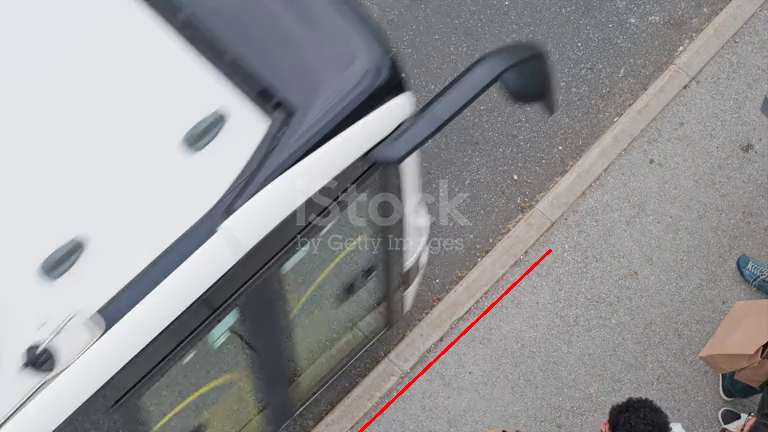

In [55]:
import cv2
from google.colab.patches import cv2_imshow

# Define slanted line points
line_pt1 = (340, 450)
line_pt2 = (550, 250)

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()

if ret:
    # Draw the slanted line
    cv2.line(frame, line_pt1, line_pt2, (0, 0, 255), 2) # Red color, thickness 2
    cv2_imshow(frame)
else:
    print("Failed to read frame from video.")

cap.release()

In [63]:
import cv2
import numpy as np

# Define entry/exit counters
entry_count = 0
exit_count = 0
track_memory = {}
track_counted = {}  # To keep track of counted tracks
track_history = {}  # To store position history for each track
history_length = 5  # Number of frames to keep in history

# Function to determine which side of the line a point is on
def point_side(px, py, x1, y1, x2, y2):
    return (x2 - x1)*(py - y1) - (y2 - y1)*(px - x1)

# Function to check if a segment crosses the line
def segment_crosses_line(p1, p2, line_pt1, line_pt2):
    side1 = point_side(p1[0], p1[1], *line_pt1, *line_pt2)
    side2 = point_side(p2[0], p2[1], *line_pt1, *line_pt2)
    return (side1 < 0 and side2 > 0) or (side1 > 0 and side2 < 0)

# Open video
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (width, height))

# Add cooldown mechanism to prevent rapid double counts
crossing_cooldown = {}  # Dictionary to store cooldown frames for each track
cooldown_frames = int(fps * 1.5)  # 1.5 second cooldown

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    results = model.predict(frame, conf=0.4, verbose=False)[0]
    detections = []

    for box in results.boxes.data:
        x1, y1, x2, y2, conf, cls = box.cpu().numpy()
        if int(cls) == 0:  # Person class
            detections.append(([x1, y1, x2 - x1, y2 - y1], conf, 'person'))

    tracks = tracker.update_tracks(detections, frame=frame)

    # Create a copy of frame for visualization
    viz_frame = frame.copy()

    for track in tracks:
        if not track.is_confirmed():
            continue

        track_id = track.track_id
        l, t, r, b = track.to_ltrb()

        # Calculate center of the bbox
        cx = int((l + r) / 2)
        cy = int((t + b) / 2)

        # Store position in track history
        if track_id not in track_history:
            track_history[track_id] = []

        track_history[track_id].append((cx, cy))
        if len(track_history[track_id]) > history_length:
            track_history[track_id].pop(0)  # Remove oldest entry

        # Initialize tracking data structures if needed
        if track_id not in track_counted:
            track_counted[track_id] = {"entry": False, "exit": False}
        if track_id not in crossing_cooldown:
            crossing_cooldown[track_id] = 0
        if crossing_cooldown[track_id] > 0:
            crossing_cooldown[track_id] -= 1

        # Check for line crossing using trajectory dots
        if len(track_history[track_id]) >= 2:
            for i in range(1, len(track_history[track_id])):
                p1 = track_history[track_id][i-1]
                p2 = track_history[track_id][i]
                if segment_crosses_line(p1, p2, line_pt1, line_pt2):
                    side1 = point_side(p1[0], p1[1], *line_pt1, *line_pt2)
                    side2 = point_side(p2[0], p2[1], *line_pt1, *line_pt2)
                    # Crossing from bottom to top
                    if side1 < 0 and side2 > 0 and not track_counted[track_id]["exit"] and crossing_cooldown[track_id] == 0:
                        entry_count += 1
                        track_counted[track_id]["exit"] = True
                        crossing_cooldown[track_id] = cooldown_frames
                        cv2.circle(viz_frame, p2, 15, (0, 255, 0), -1)
                    # Crossing from top to bottom
                    elif side1 > 0 and side2 < 0 and not track_counted[track_id]["entry"] and crossing_cooldown[track_id] == 0:
                        exit_count += 1
                        track_counted[track_id]["entry"] = True
                        crossing_cooldown[track_id] = cooldown_frames
                        cv2.circle(viz_frame, p2, 15, (0, 255, 0), -1)

        # Update memory with current position
        track_memory[track_id] = (cx, cy)

        # Visualize the track
        bbox_color = (255, 0, 0)  # Default blue

        # Different colors based on crossing status
        if track_id in track_counted:
            if track_counted[track_id]["entry"] and track_counted[track_id]["exit"]:
                bbox_color = (128, 0, 128)  # Purple for tracks that did both
            elif track_counted[track_id]["entry"]:
                bbox_color = (0, 255, 0)  # Green for tracks that entered
            elif track_counted[track_id]["exit"]:
                bbox_color = (0, 0, 255)  # Red for tracks that exited

        # Draw bounding box
        cv2.rectangle(viz_frame, (int(l), int(t)), (int(r), int(b)), bbox_color, 2)

        # Draw ID and track trajectory
        cv2.putText(viz_frame, f"ID: {track_id}", (int(l), int(t) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

        # Draw trajectory dots
        if track_id in track_history:
            for i, (hist_x, hist_y) in enumerate(track_history[track_id]):
                alpha = (i + 1) / len(track_history[track_id])
                color = (0, int(255 * alpha), int(255 * (1 - alpha)))
                cv2.circle(viz_frame, (hist_x, hist_y), 3, color, -1)

    # Clean up old tracks (those not seen in this frame)
    active_ids = {track.track_id for track in tracks if track.is_confirmed()}
    dead_tracks = [tid for tid in track_memory if tid not in active_ids]

    for tid in dead_tracks:
        if tid in track_memory:
            del track_memory[tid]

    # Draw the slanted line
    cv2.line(viz_frame, line_pt1, line_pt2, (0, 0, 255), 2)

    cv2.putText(viz_frame, f"Exit: {entry_count}  Entry: {exit_count}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (168, 160, 23), 2)  # mustard yellow


    # Show frame number for debugging
    cv2.putText(viz_frame, f"Frame: {frame_count}", (10, height - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    out.write(viz_frame)

cap.release()
out.release()
cv2.destroyAllWindows()

In [64]:
# 📤 Download result video
from google.colab import files
files.download("output.avi")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Hall detection


In [66]:
video_path = '/content/vid1.mp4'

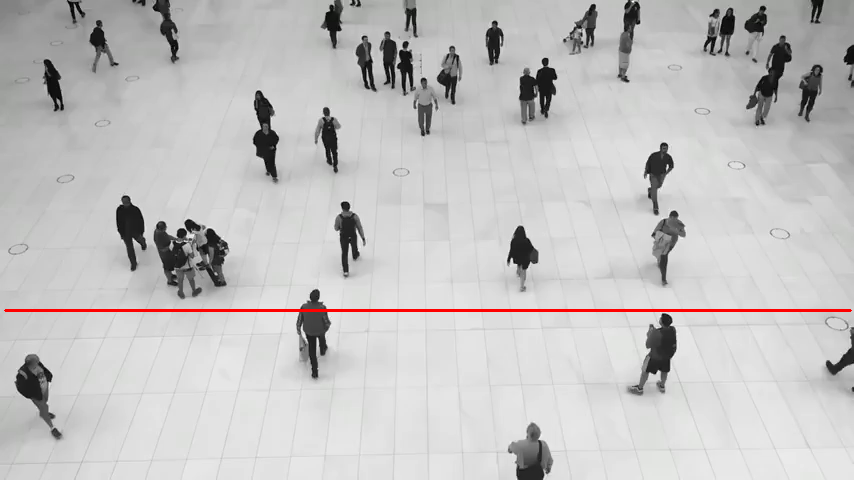

In [74]:
import cv2
from google.colab.patches import cv2_imshow

# Define slanted line points
line_pt1 = (5, 310)
line_pt2 = (850, 310)

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()

if ret:
    # Draw the slanted line
    cv2.line(frame, line_pt1, line_pt2, (0, 0, 255), 2) # Red color, thickness 2
    cv2_imshow(frame)
else:
    print("Failed to read frame from video.")

cap.release()

In [75]:
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort
import cv2
import numpy as np
from collections import defaultdict, deque
import json
import time
import os

class PersonCounter:
    def __init__(self, model_path, line_coords, max_age=50, n_init=2):
        """
        Initialize the person counter

        Args:
            model_path: Path to YOLO model
            line_coords: Tuple of ((x1,y1), (x2,y2)) for counting line
            max_age: Maximum frames to keep a track without detection
            n_init: Number of consecutive detections before track is confirmed
        """
        self.model = YOLO(model_path)
        self.tracker = DeepSort(
            max_age=max_age,
            n_init=n_init,
            nms_max_overlap=1.0,
            max_cosine_distance=0.3
        )

        # Line configuration
        self.line_pt1, self.line_pt2 = line_coords
        self.line_buffer = 20  # Pixels buffer around line for crossing detection

        # Counting variables
        self.entering = 0
        self.leaving = 0
        self.track_history = defaultdict(lambda: deque(maxlen=10))  # Keep last 10 positions
        self.crossed_tracks = set()  # Prevent duplicate counting
        self.left_tracks = set()  # Track IDs that have left (for red bounding boxes)
        self.entered_tracks = set()  # Track IDs that have entered (for blue bounding boxes)

        # Statistics
        self.total_detections = 0
        self.start_time = time.time()

    def get_centroid(self, box):
        """Calculate centroid of bounding box"""
        x1, y1, x2, y2 = map(int, box)
        cx = int((x1 + x2) / 2)
        cy = int((y1 + y2) / 2)
        return cx, cy

    def point_line_distance(self, point, line_start, line_end):
        """Calculate perpendicular distance from point to line"""
        x0, y0 = point
        x1, y1 = line_start
        x2, y2 = line_end

        # Line equation: ax + by + c = 0
        a = y2 - y1
        b = x1 - x2
        c = x2 * y1 - x1 * y2

        distance = abs(a * x0 + b * y0 + c) / np.sqrt(a**2 + b**2)
        return distance

    def check_line_crossing(self, track_id, current_pos):
        """
        Enhanced line crossing detection with trajectory analysis
        """
        history = self.track_history[track_id]
        history.append(current_pos)

        # Need at least 3 points for reliable crossing detection
        if len(history) < 3:
            return

        # Check if track has already been counted recently
        track_key = f"{track_id}_{len(history)}"
        if track_key in self.crossed_tracks:
            return

        # Analyze trajectory over last few frames
        positions = list(history)[-5:]  # Last 5 positions

        # Check for line crossing
        line_crossings = []
        for i in range(len(positions) - 1):
            if self._line_intersection(positions[i], positions[i+1]):
                line_crossings.append(i)

        if line_crossings:
            # Determine direction based on perpendicular distance to line
            start_pos = positions[0]
            end_pos = positions[-1]

            start_dist = self.point_line_distance(start_pos, self.line_pt1, self.line_pt2)
            end_dist = self.point_line_distance(end_pos, self.line_pt1, self.line_pt2)

            # Determine which side of line (for horizontal line, check Y coordinate)
            start_side = 1 if start_pos[1] > self.line_pt1[1] else -1
            end_side = 1 if end_pos[1] > self.line_pt1[1] else -1

            if start_side != end_side:  # Crossed the line
                if start_side == -1 and end_side == 1:
                    self.entering += 1
                    self.entered_tracks.add(track_id)  # Mark this track as having entered
                    print(f"Person {track_id} ENTERED")
                elif start_side == 1 and end_side == -1:
                    self.leaving += 1
                    self.left_tracks.add(track_id)  # Mark this track as having left
                    print(f"Person {track_id} LEFT")

                # Prevent duplicate counting
                self.crossed_tracks.add(track_key)

                # Clear history after counting
                self.track_history[track_id].clear()

    def _line_intersection(self, p1, p2):
        """Check if line segment p1-p2 intersects with counting line"""
        x1, y1 = p1
        x2, y2 = p2
        x3, y3 = self.line_pt1
        x4, y4 = self.line_pt2

        denom = (x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
        if abs(denom) < 1e-10:
            return False

        t = ((x1-x3)*(y3-y4) - (y1-y3)*(x3-x4)) / denom
        u = -((x1-x2)*(y1-y3) - (y1-y2)*(x1-x3)) / denom

        return 0 <= t <= 1 and 0 <= u <= 1

    def draw_annotations(self, frame):
        """Draw counting line, statistics, and other annotations"""
        height, width = frame.shape[:2]

        # Draw counting line
        cv2.line(frame, self.line_pt1, self.line_pt2, (0, 255, 255), 3)

        # Draw line buffer zone (optional visualization)
        # This helps visualize the crossing detection area

        # Statistics panel
        panel_height = 150
        overlay = frame.copy()
        cv2.rectangle(overlay, (10, 10), (400, panel_height), (0, 0, 0), -1)
        cv2.addWeighted(overlay, 0.7, frame, 0.3, 0, frame)

        # Text information
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, f'ENTERING: {self.entering}', (20, 40),
                   font, 0.8, (0, 255, 0), 2)
        cv2.putText(frame, f'LEAVING: {self.leaving}', (20, 70),
                   font, 0.8, (0, 0, 255), 2)
        cv2.putText(frame, f'NET COUNT: {self.entering - self.leaving}', (20, 100),
                   font, 0.8, (255, 255, 255), 2)
        cv2.putText(frame, f'ACTIVE TRACKS: {len([h for h in self.track_history.values() if h])}',
                   (20, 130), font, 0.6, (255, 255, 0), 2)

        # Runtime statistics
        runtime = time.time() - self.start_time
        fps = self.total_detections / max(runtime, 1)
        cv2.putText(frame, f'AVG FPS: {fps:.1f}', (width - 150, 30),
                   font, 0.6, (255, 255, 255), 2)

    def process_frame(self, frame):
        """Process a single frame"""
        self.total_detections += 1

        # YOLO detection
        results = self.model(frame, verbose=False)[0]
        detections = []

        # Extract person detections
        for box in results.boxes:
            cls_id = int(box.cls[0].cpu().numpy())
            if cls_id != 0:  # Only process 'person' class
                continue

            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            conf = float(box.conf[0].cpu().numpy())

            # Filter low confidence detections
            if conf < 0.5:
                continue

            detections.append(([x1, y1, x2 - x1, y2 - y1], conf, cls_id))

        # Update tracker
        tracks = self.tracker.update_tracks(detections, frame=frame)

        # Process confirmed tracks
        for track in tracks:
            if not track.is_confirmed():
                continue

            track_id = track.track_id
            ltrb = track.to_ltrb()
            centroid = self.get_centroid(ltrb)

            # Check for line crossing
            self.check_line_crossing(track_id, centroid)

            # Draw bounding box and ID with color based on status
            x1, y1, x2, y2 = map(int, ltrb)

            # Choose color based on crossing status
            if track_id in self.left_tracks:
                box_color = (0, 0, 255)  # Red for people who have left
                text_color = (0, 0, 255)  # Red text
            elif track_id in self.entered_tracks:
                box_color = (0, 255, 0)  # Green for people who have entered
                text_color = (0, 255, 0)  # Green text
            else:
                box_color = (255, 0, 0)  # Blue for active/uncrossed people
                text_color = (255, 0, 0)  # Blue text

            cv2.rectangle(frame, (x1, y1), (x2, y2), box_color, 2)
            cv2.putText(frame, f'ID: {track_id}', (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, text_color, 2)

            # Draw track history (trajectory) with color based on status
            if len(self.track_history[track_id]) > 1:
                points = list(self.track_history[track_id])
                if track_id in self.left_tracks:
                    trajectory_color = (0, 0, 128)  # Dark red for left
                elif track_id in self.entered_tracks:
                    trajectory_color = (0, 128, 0)  # Dark green for entered
                else:
                    trajectory_color = (128, 0, 0)  # Dark blue for active

                for i in range(len(points) - 1):
                    cv2.line(frame, points[i], points[i + 1], trajectory_color, 2)

        # Draw annotations
        self.draw_annotations(frame)

        return frame

    def get_statistics(self):
        """Return counting statistics"""
        return {
            'entering': self.entering,
            'leaving': self.leaving,
            'net_count': self.entering - self.leaving,
            'total_detections': self.total_detections,
            'runtime': time.time() - self.start_time
        }

def process_video(input_path, output_path, model_path, line_coords, overwrite=True):

    # Check if output file exists and handle overwriting
    if os.path.exists(output_path):
        if overwrite:
            print(f"Output file exists. Overwriting: {output_path}")
            os.remove(output_path)
        else:
            # Create new filename with timestamp
            base, ext = os.path.splitext(output_path)
            timestamp = int(time.time())
            output_path = f"{base}_{timestamp}{ext}"
            print(f"Output file exists. Creating new file: {output_path}")

    # Initialize counter
    counter = PersonCounter(model_path, line_coords)

    # Video capture
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        raise ValueError(f"Cannot open video: {input_path}")

    # Video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    print(f"Processing video: {width}x{height} @ {fps} FPS, {total_frames} frames")

    frame_count = 0
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            # Process frame
            processed_frame = counter.process_frame(frame)
            out.write(processed_frame)

            frame_count += 1
            if frame_count % 100 == 0:
                print(f"Processed {frame_count}/{total_frames} frames "
                      f"({100*frame_count/total_frames:.1f}%)")

    finally:
        cap.release()
        out.release()

    # Final statistics
    stats = counter.get_statistics()
    print("\n=== Final Statistics ===")
    print(f"Entering: {stats['entering']}")
    print(f"Leaving: {stats['leaving']}")
    print(f"Net Count: {stats['net_count']}")
    print(f"Processing Time: {stats['runtime']:.1f}s")
    print(f"Average FPS: {stats['total_detections']/stats['runtime']:.1f}")

    return stats

# Example usage
if __name__ == "__main__":
    # Configuration
    VIDEO_PATH = "/content/vid1.mp4"
    MODEL_PATH = "/content/Model/Yolov8n.pt"
    OUTPUT_PATH = "/content/sample_data/enhanced_output.mp4"

    # Define counting line (horizontal line across the frame)
    # Adjust these coordinates based on your video
    LINE_COORDS = ((5, 310), (850, 310))  # Horizontal line from left to right

    try:
        # Process video with overwrite enabled by default
        stats = process_video(VIDEO_PATH, OUTPUT_PATH, MODEL_PATH, LINE_COORDS, overwrite=True)


    except Exception as e:
        print(f"Error processing video: {e}")

Processing video: 854x480 @ 25.0 FPS, 341 frames
Person 8 LEFT
Person 33 LEFT
Person 9 ENTERED
Person 7 ENTERED
Person 2 LEFT
Person 5 ENTERED
Processed 100/341 frames (29.3%)
Person 50 ENTERED
Person 41 LEFT
Person 48 LEFT
Person 21 ENTERED
Person 28 ENTERED
Person 51 LEFT
Person 23 ENTERED
Person 64 ENTERED
Person 46 ENTERED
Processed 200/341 frames (58.7%)
Person 1 ENTERED
Person 17 ENTERED
Person 24 ENTERED
Person 68 LEFT
Processed 300/341 frames (88.0%)
Person 16 ENTERED
Person 14 ENTERED
Person 80 LEFT

=== Final Statistics ===
Entering: 14
Leaving: 8
Net Count: 6
Processing Time: 494.4s
Average FPS: 0.7
Error processing video: [Errno 2] No such file or directory: '/kaggle/working/counting_stats.json'
